## FIRST & FOREMOST 
This was by FAR the hardest assignment I had to submit during my year at Goldsmiths. With that being said, I do feel a sense of achievement taking on this project.

This notebook contains the following:

1) Screenshot of OpenDota's API. (Had to wrap my head around it and learn a bit of SQL, but I finally managed to retrieve the data that I wanted and save it as a csv file.) 
    * bigdota.csv can be located in the cluster, I believe you would be able to access it as an admin. File path: nmouk001@dsm10.doc.gold.ac.uk and can be found inside the 'bigdata' directory.
2) Start the spark session and read the dataframe

3) Used pandas to examine the data and check whether the outcomes were skewed or not.

4) Modified the dataset (removed columns match_id, start_time, hero_id and account_id)

5) Converted 'win' column from boolean to int type.

6) Prepared data for MachineLearning (OneHotEncoderEstimator, StringIndexer, VectorAssembler)

7) Designed pipeline flow for models 

8) Applied ML classification models (Logistic Regression, Decision Trees, Random Forest & Gradient Boosting Trees)

**The classification goal is to predict whether professional players will win or lose their DOTA game.**

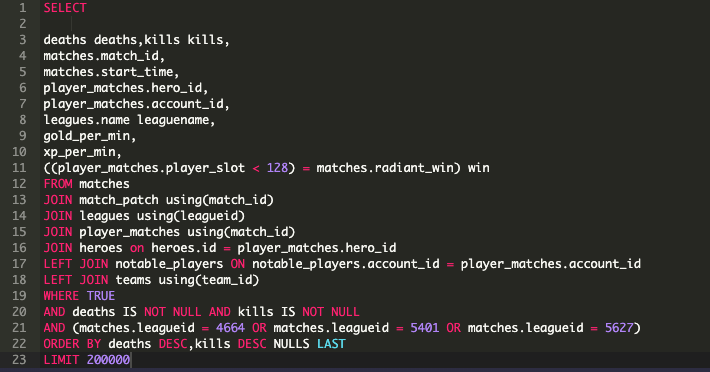

In [1]:
# Import packages
import pyspark as ps
from pyspark  import SparkContext , SparkConf
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
import pandas as pd
import numpy as np
conf = SparkConf().setAppName('bigdata')
sc = ps.SparkContext('local[4]')
sq = SQLContext(sc)

In [2]:
# Sparksession is the main entry point for Spark functionality
spark = SparkSession.builder.appName('bigdata').getOrCreate()

Input variables: deaths,kills,match_id,start_time,hero_id,account_id,leaguename,gold_per_min,xp_per_min
Output variables: win

In [3]:
df = spark.read.csv('bigdota.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- deaths: integer (nullable = true)
 |-- kills: integer (nullable = true)
 |-- match_id: long (nullable = true)
 |-- start_time: integer (nullable = true)
 |-- hero_id: integer (nullable = true)
 |-- account_id: integer (nullable = true)
 |-- leaguename: string (nullable = true)
 |-- gold_per_min: integer (nullable = true)
 |-- xp_per_min: integer (nullable = true)
 |-- win: boolean (nullable = true)



## Pandas - data exploration

In [4]:
# Pandas dataframe
pdf = pd.read_csv("bigdota.csv")
pdf

,deaths,kills,match_id,start_time,hero_id,account_id,leaguename,gold_per_min,xp_per_min,win
0,20,5,3275038059,1498472722,51,98167706,The International 2017,296,386,False
1,20,2,3354345479,1501812586,45,19672354,The International 2017,323,450,False
2,20,1,3597031137,1512307524,79,82262664,DreamLeague season 8,203,275,False
3,19,9,2467763435,1467120501,32,207829314,The International 2016,266,336,False
4,19,3,3279022993,1498644510,101,136349844,The International 2017,250,315,False
5,17,9,2549111670,1470337643,98,184950344,The International 2016,630,449,False
6,17,7,2549111670,1470337643,90,85805514,The International 2016,327,357,False
7,17,7,3278894409,1498639769,51,142750189,The International 2017,304,320,False
8,17,5,2549111670,1470337643,20,173476224,The International 2016,286,413,False
9,17,4,3275351174,1498482399,51,94049589,The International 2017,291,406,True


Wow! Perfectly balanced outcomes!!! wait...that makes sense...two teams face each other in these tournaments..one wins while the other losses..kinda makes sense (got too excited for a minute)

In [5]:
# See if there is balance between the two outcomes in win column (True: team wins, False: team loses)
pdf['win'].value_counts()

True     5600
False    5600
Name: win, dtype: int64

Remove unnecessary columns

In [54]:
# Drop match_id, start_time, hero_id and account_id
df = df.select('kills','deaths','leaguename',
                'gold_per_min','xp_per_min','win')
cols = df.columns
df.printSchema()

root
 |-- kills: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- leaguename: string (nullable = true)
 |-- gold_per_min: integer (nullable = true)
 |-- xp_per_min: integer (nullable = true)
 |-- win: integer (nullable = true)



## Correlation between variables

In [56]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
kills,11200,4.609732142857143,3.9780083376650257,0,29
deaths,11200,4.734910714285714,2.9429487589908403,0,20
gold_per_min,11200,399.81714285714287,156.66283768052415,103,1227
xp_per_min,11200,428.8375,146.36224818118615,71,1204
win,11200,0.5,0.5000223229234204,0,1


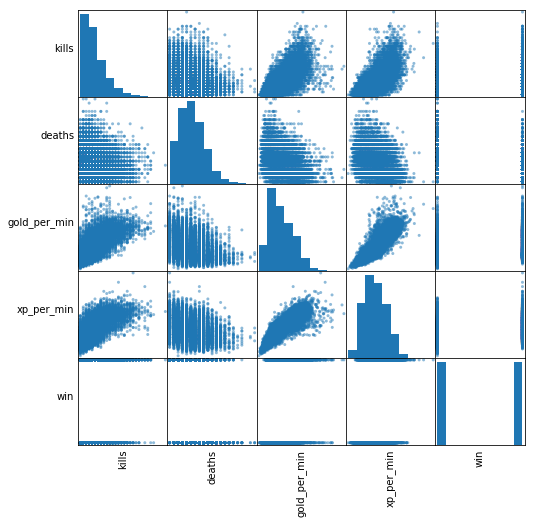

In [57]:
# Correlation between different variables

numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
corr = len(numeric_data.columns)
for i in range(corr):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[corr-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

Strong positive correlation between the following:
* gold_per_min and xp_per_min
* gold_per_min and kills
* xp_per_min and kills

*This makes sense, players receive gold and xp for killing enemy heroes*

In [9]:
# Convert boolean to string
df = df.withColumn("win",df.win.cast("int"))
df.dtypes

[('kills', 'int'),
 ('deaths', 'int'),
 ('leaguename', 'string'),
 ('gold_per_min', 'int'),
 ('xp_per_min', 'int'),
 ('win', 'int')]

In [26]:
categoricalColumns = ['leaguename']
stages = [] # stages in our Pipeline

### Preparing data for machine learning
The process includes Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column.

In [27]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

#The following code is taken from https://docs.databricks.com/spark/latest/mllib/binary-classification-mllib-pipelines.html
for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer - Indexes categorical columns 
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    # Use OneHotEncoder to convert categorical variables into binary SparseVectors
    # encoder = OneHotEncoderEstimator(inputCol=categoricalCol + "Index", outputCol=categoricalCol + "classVec")
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]
    
label_stringIdx = StringIndexer(inputCol = 'win', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['gold_per_min', 'xp_per_min', 'kills', 'deaths']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

The code above indexes each categorical column using the StringIndexer, then converts the indexed categories into one-hot encoded variables. The resulting output has the binary vectors appended to the end of each row. Apply the  StringIndexer again to encode the labels to label indices. Next, use the VectorAssembler to combine all the feature columns into a single vector column.

## Pipeline
Use Pipeline to chain multiple Transformers and Estimators together to specify the machine learning workflow. 

In [12]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- kills: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- leaguename: string (nullable = true)
 |-- gold_per_min: integer (nullable = true)
 |-- xp_per_min: integer (nullable = true)
 |-- win: integer (nullable = true)



Split the dataset into train(70%) and test(30%)

In [13]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7789
Test Dataset Count: 3411


## Logistic Regression Model

In [28]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

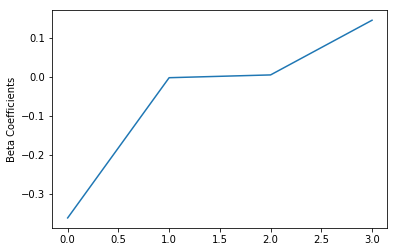

In [29]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

The receiver-operating characteristic and areaUnderROC for LogReg.

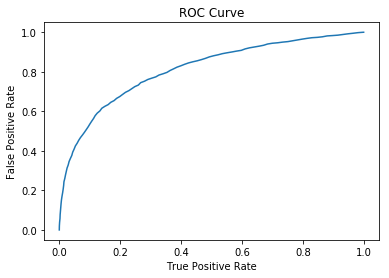

Training set areaUnderROC: 0.8117673320577874


In [30]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

### Precision & Recall

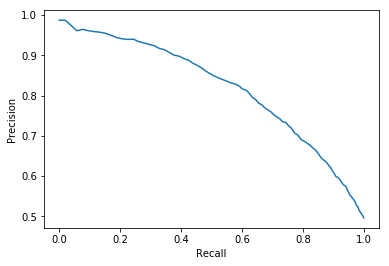

In [31]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

Predictions on the test set.

In [37]:
predictions = lrModel.transform(test)
predictions.select('gold_per_min','xp_per_min', 'kills', 'deaths', 'rawPrediction', 'prediction', 'probability').show(10)

+------------+----------+-----+------+--------------------+----------+--------------------+
|gold_per_min|xp_per_min|kills|deaths|       rawPrediction|prediction|         probability|
+------------+----------+-----+------+--------------------+----------+--------------------+
|         120|       113|    0|     8|[2.48913303846667...|       0.0|[0.92337648559142...|
|         121|       168|    0|     1|[-0.2844425697187...|       1.0|[0.42936495910299...|
|         130|       161|    0|     4|[0.85703820852004...|       0.0|[0.70204148002235...|
|         134|       150|    1|    11|[3.30594400715591...|       0.0|[0.96463216315522...|
|         136|       192|    2|     9|[2.25787299415377...|       0.0|[0.90532748326742...|
|         138|       186|    0|     3|[0.40679843474777...|       0.0|[0.60031995568556...|
|         139|       151|    0|     7|[2.01173634314960...|       0.0|[0.88202382212135...|
|         141|       153|    0|     7|[2.00840082485548...|       0.0|[0.8816762

In [43]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8060189455135961


#### *Test Area under ROC: 0.8060189455135961*
***

## Decision Tree Classifier

In [46]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('gold_per_min','xp_per_min', 'kills', 'deaths', 'rawPrediction', 'prediction', 'probability').show(10)

+------------+----------+-----+------+-------------+----------+--------------------+
|gold_per_min|xp_per_min|kills|deaths|rawPrediction|prediction|         probability|
+------------+----------+-----+------+-------------+----------+--------------------+
|         120|       113|    0|     8| [821.0,41.0]|       0.0|[0.95243619489559...|
|         121|       168|    0|     1|  [26.0,85.0]|       1.0|[0.23423423423423...|
|         130|       161|    0|     4| [821.0,41.0]|       0.0|[0.95243619489559...|
|         134|       150|    1|    11| [821.0,41.0]|       0.0|[0.95243619489559...|
|         136|       192|    2|     9| [821.0,41.0]|       0.0|[0.95243619489559...|
|         138|       186|    0|     3|[214.0,138.0]|       0.0|[0.60795454545454...|
|         139|       151|    0|     7| [821.0,41.0]|       0.0|[0.95243619489559...|
|         141|       153|    0|     7| [821.0,41.0]|       0.0|[0.95243619489559...|
|         141|       179|    1|     9| [821.0,41.0]|       0.0|[0

In [47]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7168816314627854


#### *Test Area under ROC: 0.7168816314627854*
***

## Random Forest Classifier

In [44]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('gold_per_min','xp_per_min', 'kills', 'deaths', 'rawPrediction', 'prediction', 'probability').show(10)

+------------+----------+-----+------+--------------------+----------+--------------------+
|gold_per_min|xp_per_min|kills|deaths|       rawPrediction|prediction|         probability|
+------------+----------+-----+------+--------------------+----------+--------------------+
|         120|       113|    0|     8|[19.3036645365690...|       0.0|[0.96518322682845...|
|         121|       168|    0|     1|[16.8368385757391...|       0.0|[0.84184192878695...|
|         130|       161|    0|     4|[19.5010353919085...|       0.0|[0.97505176959542...|
|         134|       150|    1|    11|[19.3036645365690...|       0.0|[0.96518322682845...|
|         136|       192|    2|     9|[19.2989026318071...|       0.0|[0.96494513159035...|
|         138|       186|    0|     3|[18.7193857752449...|       0.0|[0.93596928876224...|
|         139|       151|    0|     7|[19.3036645365690...|       0.0|[0.96518322682845...|
|         141|       153|    0|     7|[19.3036645365690...|       0.0|[0.9651832

In [45]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8249947213091982


### *Test Area under ROC: 0.8249947213091982*
***

## Gradient-Boosted Tree Classifier

In [48]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select('gold_per_min','xp_per_min', 'kills', 'deaths', 'rawPrediction', 'prediction', 'probability').show(10)

+------------+----------+-----+------+--------------------+----------+--------------------+
|gold_per_min|xp_per_min|kills|deaths|       rawPrediction|prediction|         probability|
+------------+----------+-----+------+--------------------+----------+--------------------+
|         120|       113|    0|     8|[1.30751439703401...|       0.0|[0.93182256648704...|
|         121|       168|    0|     1|[0.53228029957137...|       0.0|[0.74356111665435...|
|         130|       161|    0|     4|[1.30326476836979...|       0.0|[0.93128062912380...|
|         134|       150|    1|    11|[1.30751439703401...|       0.0|[0.93182256648704...|
|         136|       192|    2|     9|[1.30751439703401...|       0.0|[0.93182256648704...|
|         138|       186|    0|     3|[1.20664757696533...|       0.0|[0.91783552327001...|
|         139|       151|    0|     7|[1.30751439703401...|       0.0|[0.93182256648704...|
|         141|       153|    0|     7|[1.30751439703401...|       0.0|[0.9318225

In [49]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.837340667790495


#### *Test Area under ROC: 0.837340667790495*
***

Tuning: Cross Validation on gradient boosting (best performing model)

In [50]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train)
predictions = cvModel.transform(test)
evaluator.evaluate(predictions)

0.8433822755662291

To summarise: I have been able to retrieve information from OpenDota's API using their own SQL IDE. I was then able to analyse the data, configure it and build a binary classification application - using PySpark and MLlib. 
Out of the four algorithms gradient boosting performed best on the data set.